In [45]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
del dirname, filenames

/kaggle/input/lendingclub-data-sets/lending_club_info.csv
/kaggle/input/lendingclub-data-sets/lending_club_loan_two.csv


## The Data

We will be using a **subset** of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club


LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [47]:
# Read the data information file
data_info = pd.read_csv('../input/lendingclub-data-sets/lending_club_info.csv', index_col='LoanStatNew')
data_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [48]:
# Define a function to print out feature information
def feat_info(col_name):
    return data_info.loc[col_name]['Description']

feat_info('loan_amnt')

'The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.'

In [49]:
# Read the data
df = pd.read_csv('../input/lendingclub-data-sets/lending_club_loan_two.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [50]:
df_describe = df.describe().T
d_types = pd.DataFrame(df.dtypes, columns=['Data Type'])
isnull = pd.DataFrame(df.isnull().sum(), columns=['is_null'])
# [*map(len, (df_describe, d_types, isnull))]
df.head(2).T.merge(d_types, left_index=True, right_index=True).merge(isnull, left_index=True, right_index=True).merge(df_describe, left_index=True, right_index=True, how='left')
del df_describe, isnull, d_types

------

# Section 1: Exploratory Data Analysis

**GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

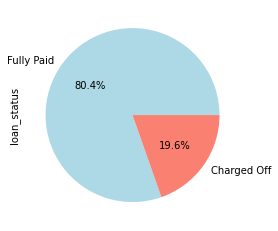

In [51]:
# Create a count plot of loan_status
df['loan_status'].value_counts().plot(kind='pie', 
                                      colors=['lightblue', 'salmon'],
                                      autopct='%1.1f%%',
                                      legend=False);

We are dealing with an unbalanced problem
* Evaluation based on accuracy might be misleading
* Precision and recall are important evaluation metrics

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

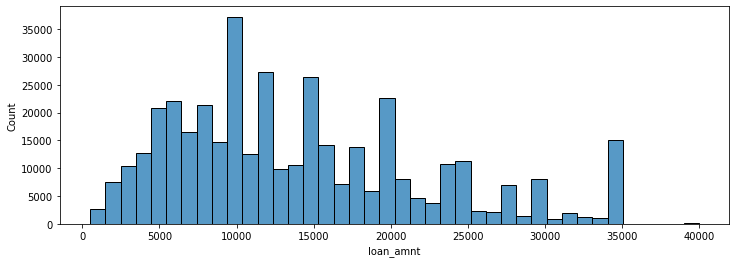

In [52]:
# Create a histogram of the loan_amnt column
plt.figure(figsize=(12, 4))
sns.histplot(df['loan_amnt'], bins=40)

Spikes happening at 'even' money amounts such 10,000 or 15,000, or 20,000 which makes sense

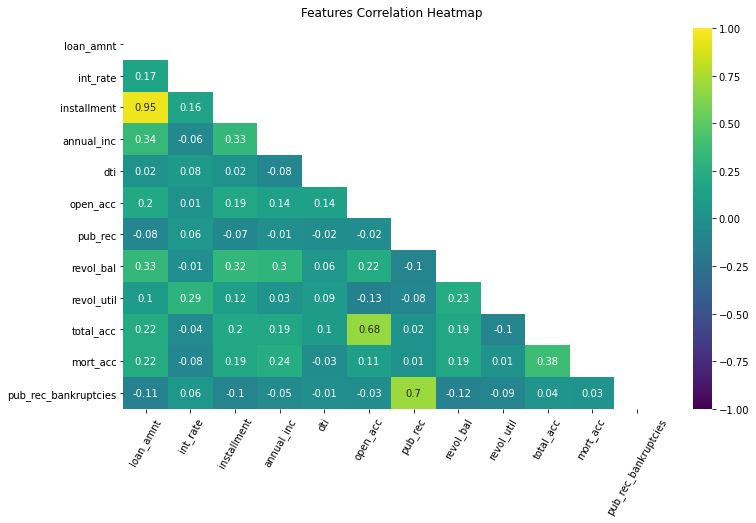

In [53]:
# Explore correlation between the continuous numeric feature variables
corr = df.corr().round(2)
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(12, 7))
heatmap = sns.heatmap(corr,
            mask=mask,
           annot=True,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           vmin=-1, 
           vmax=1, 
           cmap='viridis' 
           )
plt.xticks(rotation=60)
heatmap.set_title('Features Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
del corr, mask

In [54]:
# Explore features with high correlation
dict(
    zip(
        ('total_acc', 'open_acc'), 
        map(feat_info, ('total_acc', 'open_acc'))
)
)

{'total_acc': "The total number of credit lines currently in the borrower's credit file",
 'open_acc': "The number of open credit lines in the borrower's credit file."}

In [55]:
# Explore features with high correlation
dict(zip(('pub_rec_bankruptcies', 'pub_rec'), map(feat_info, ('pub_rec_bankruptcies', 'pub_rec'))))

{'pub_rec_bankruptcies': 'Number of public record bankruptcies',
 'pub_rec': 'Number of derogatory public records'}

In [56]:
# Explore features with high correlation
dict(zip(('mort_acc', 'total_acc'), map(feat_info, ('mort_acc', 'total_acc'))))

{'mort_acc': 'Number of mortgage accounts.',
 'total_acc': "The total number of credit lines currently in the borrower's credit file"}

In [57]:
# Explore features with high correlation
dict(zip(('installment', 'loan_amnt'), map(feat_info, ('installment', 'loan_amnt'))))

{'installment': 'The monthly payment owed by the borrower if the loan originates.',
 'loan_amnt': 'The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.'}

If, no matter what the amount the loan, the number of installments are similar, loan_amount and loan installment amount are linearly dependent and representing the same information and we have duplicate information in here

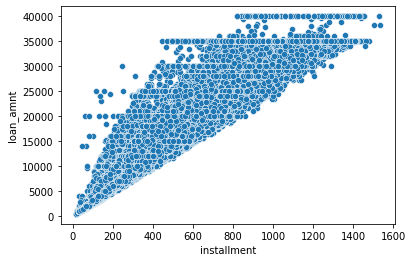

In [58]:
sns.scatterplot(data=df, x='installment', y='loan_amnt');

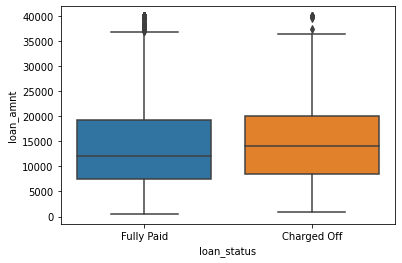

In [59]:
# Explore the relationship between loan_status and loan amount
sns.boxplot(x='loan_status', y='loan_amnt', data=df);

In [60]:
# Calculate the summary statistics for the loan amount, grouped by the loan_status.
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [61]:
# Explore the Grade and SubGrade columns that attributed to the loans by LendingClub (LC).
dict(zip(('grade', 'sub_grade'), 
         map(feat_info, ('grade', 'sub_grade'))
        )
    )

{'grade': 'LC assigned loan grade', 'sub_grade': 'LC assigned loan subgrade'}

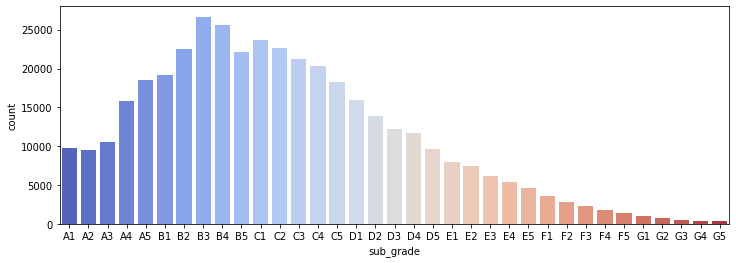

In [62]:
plt.figure(figsize=(12, 4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df, order=subgrade_order, palette='coolwarm');

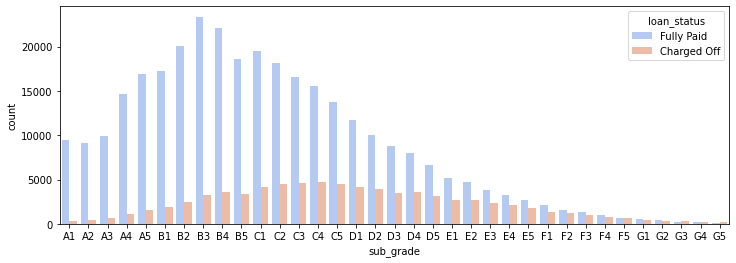

In [63]:
plt.figure(figsize=(12, 4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade', data=df, order=subgrade_order, palette='coolwarm', hue='loan_status');

<AxesSubplot:xlabel='grade', ylabel='count'>

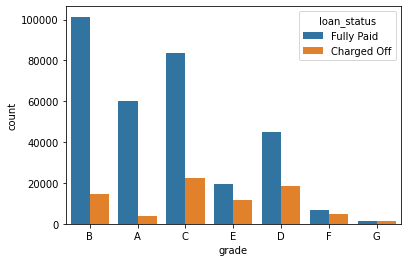

In [64]:
# Create a countplot per grade. Set the hue to the loan_status label
sns.countplot(x='grade', data=df, hue='loan_status')

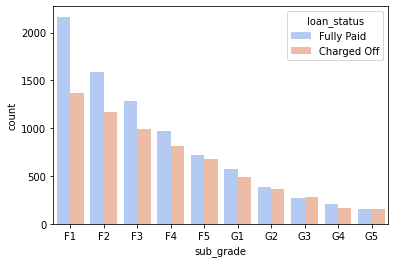

In [65]:
# Explore Gardes F and G
f_and_g = df[(df['grade'] == 'F') | (df['grade'] == 'G') ]
f_and_g_subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade', data=f_and_g, hue='loan_status', 
              order=f_and_g_subgrade_order, palette='coolwarm')
del f_and_g_subgrade_order, f_and_g

In [66]:
# Change the 'loan_repaid' column from "Fully Paid" and "Charged Off" to 1 and 0
df['loan_repaid'] = df['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})
df[['loan_status', 'loan_repaid']].head()

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0


<AxesSubplot:>

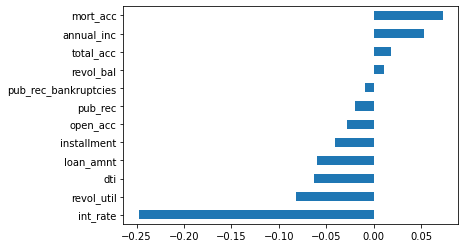

In [67]:
# Explore the correlation of loan_repaid with some features
plt.figure
df.corr()['loan_repaid'].drop('loan_repaid').sort_values().plot.barh()

---
---
# Section 2: Data PreProcessing

**Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**


# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

In [68]:
# Explore the shape of the dataframe
df.shape

(396030, 28)

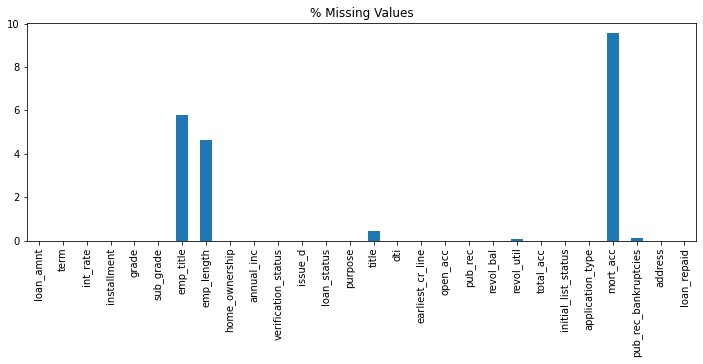

In [69]:
# Create a Series that displays the total count of missing values per column.
plt.figure(figsize=(12, 4))
df.isnull().sum().div(df.shape[0]).mul(100).plot.bar();
plt.title('% Missing Values');

In [70]:
# Examine `emp_title` and `emp_length` to see whether it will be okay to drop them.
dict(zip(('emp_title', 'emp_length'), map(feat_info, ('emp_title', 'emp_length'))))

{'emp_title': 'The job title supplied by the Borrower when applying for the loan.*',
 'emp_length': 'Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. '}

In [71]:
df['emp_title'].nunique()

173105

In [72]:
df['emp_title'].value_counts()

Teacher                                     4389
Manager                                     4250
Registered Nurse                            1856
RN                                          1846
Supervisor                                  1830
                                            ... 
EVP, Head of Bank Operations                   1
Darden Restaurants Inc. (Longhorn Steak)       1
Sr. Technology Specialist                      1
Bohlin Cwinski Jackson Architects              1
ChemStation                                    1
Name: emp_title, Length: 173105, dtype: int64

There are too many unique job titles to convert to dummy features

In [73]:
# Drop `emp_title` column
df.drop('emp_title', axis=1, inplace=True)

In [74]:
# Examine emp_length column
df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [75]:
# Examine emp_length column
df['emp_length'].value_counts().sort_values(ascending=False).index

Index(['10+ years', '2 years', '< 1 year', '3 years', '5 years', '1 year',
       '4 years', '6 years', '7 years', '8 years', '9 years'],
      dtype='object')

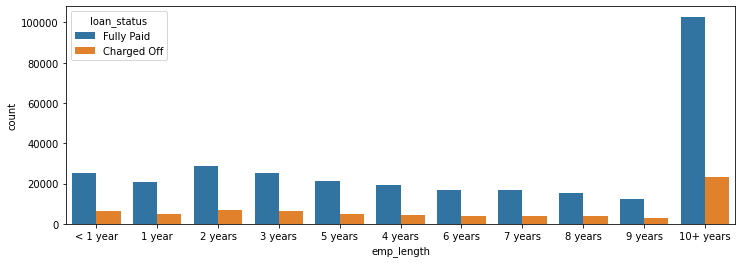

In [76]:
plt.figure(figsize=(12, 4))
emp_length_order = [ '< 1 year', '1 year', '2 years', 
                    '3 years', '5 years', '4 years', 
                    '6 years', '7 years', '8 years', 
                    '9 years', '10+ years'
                   ]
sns.countplot(x='emp_length', data=df, order=emp_length_order, hue='loan_status');

The chart shows no significatnt relationship between the length of employment and the rate of charge off.

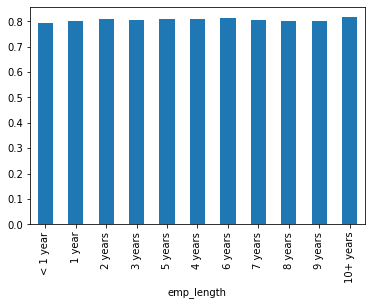

In [77]:
# Explore furtur the importance of emp_length column
df.groupby('emp_length')['loan_repaid'].mean().loc[emp_length_order].plot.bar();
del emp_length_order

In [78]:
# Drop emp_length column as it does not have a significant effect on the rate of charge off
df.drop('emp_length', axis=1, inplace=True)

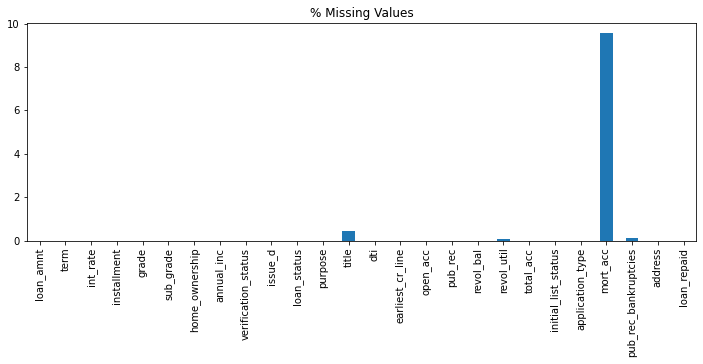

In [79]:
# Revisit the DataFrame to see what feature columns still have missing data.
plt.figure(figsize=(12, 4))
df.isnull().sum().div(df.shape[0]).mul(100).plot.bar();
plt.title('% Missing Values');

In [80]:
# Review the `title` column vs the `purpose` column to see if there is any repated information
dict(zip(['title', 'purpose'], map(feat_info, ['title', 'purpose'])))

{'title': 'The loan title provided by the borrower',
 'purpose': 'A category provided by the borrower for the loan request. '}

In [81]:
df[['title', 'purpose']]

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
...,...,...
396025,Debt consolidation,debt_consolidation
396026,Debt consolidation,debt_consolidation
396027,pay off credit cards,debt_consolidation
396028,Loanforpayoff,debt_consolidation


The `title` column looks like a description of the `purpose` 

In [82]:
# Drop `title` column
df.drop('title', axis=1, inplace=True)

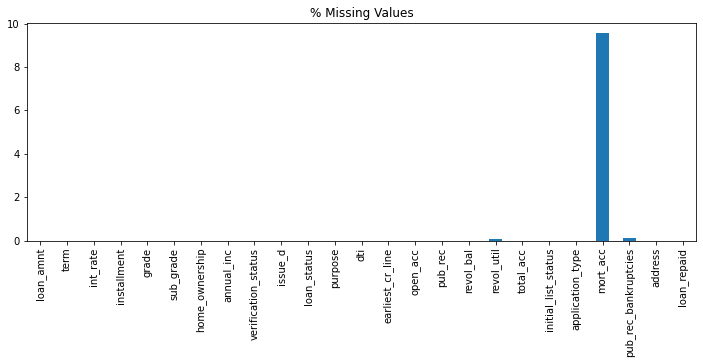

In [83]:
# Revisit the DataFrame to see what feature columns still have missing data.
plt.figure(figsize=(12, 4))
df.isnull().sum().div(df.shape[0]).mul(100).plot.bar();
plt.title('% Missing Values');

In [84]:
# Find out what is the description of mort_acc feature
feat_info('mort_acc')

'Number of mortgage accounts.'

In [85]:
# Create a value_counts of the the mort_acc
df['mort_acc'].value_counts()


0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
31.0         2
26.0         2
32.0         2
28.0         1
34.0         1
30.0         1
Name: mort_acc, dtype: int64

In order to decide whether or not fill the missing values of mort_acc and how to do so, we are going to explore other columns that have a high correlation with mort_acc

<AxesSubplot:>

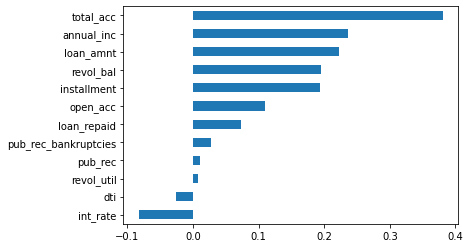

In [86]:
df.corr()['mort_acc'].drop('mort_acc').sort_values().plot.barh()

total_acc highly correlates with mort_acc
We are going to group_by total_acc and use the mean value of mort_acc for missing mort_acc value per group of total_acc

In [87]:
df['mort_acc'] = df.groupby('total_acc')['mort_acc'].transform(lambda x: x.fillna(x.mean()))

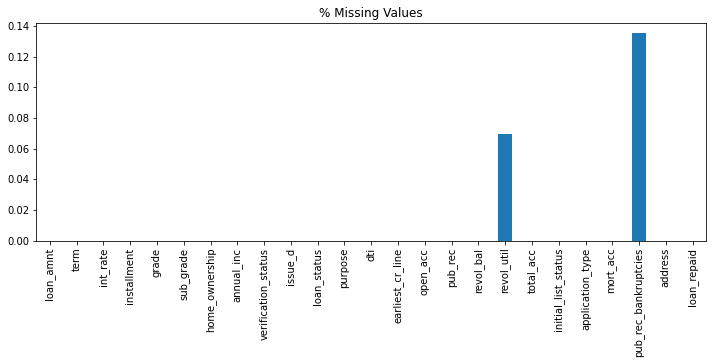

In [88]:
# Revisit the DataFrame to see what feature columns still have missing data.
plt.figure(figsize=(12, 4))
df.isnull().sum().div(df.shape[0]).mul(100).plot.bar();
plt.title('% Missing Values');

We are going to drop missing rows in revol_util and pub_rec_bankruptcies columns as they account for less than 0.5% of the total data.

In [89]:
df.drop(['revol_util', 'pub_rec_bankruptcies'], axis=1, inplace=True)

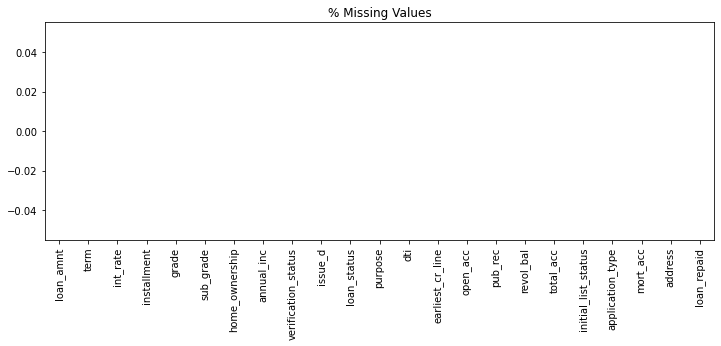

In [90]:
# Revisit the DataFrame to see what feature columns still have missing data.
plt.figure(figsize=(12, 4))
df.isnull().sum().div(df.shape[0]).mul(100).plot.bar();
plt.title('% Missing Values');

## Categorical and Dummy Variables

**Now we are going to deal with the string values due to the categorical columns.**

In [91]:
# List all the columns that are currently non-numeric.
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**We now go through all the string features to see what we should do with them.**

---

In [92]:
# Examine the 'term' feature
feat_info('term')

'The number of payments on the loan. Values are in months and can be either 36 or 60.'

In [93]:
df['term'].value_counts()

 36 months    302005
 60 months     94025
Name: term, dtype: int64

One method is two use one_hot encoding as term is actually a categorical variable but as length is also meaningful as a numeric variable, we are going to convert it into an int number

In [94]:
# Convert term to int varibale
df['term'] = df['term'].str[1:3].astype(int)

In [95]:
# Drop Grade as grade is part of sub_grade
df.drop('grade', axis=1, inplace=True)

In [96]:
# Convert the subgrade into dummy variables.
dummies = pd.get_dummies(df['sub_grade'], drop_first=True)
df = pd.concat([df.drop('sub_grade', axis=1), dummies], axis=1)

In [97]:
# Explore verification_status, application_type, initial_list_status, and purpose to dummies
dict(
zip(['verification_status', 'application_type', 'initial_list_status', 'purpose'],
    map(feat_info, ['verification_status', 'application_type', 'initial_list_status', 'purpose']))
)

{'verification_status': 'Indicates if income was verified by LC, not verified, or if the income source was verified',
 'application_type': 'Indicates whether the loan is an individual application or a joint application with two co-borrowers',
 'initial_list_status': 'The initial listing status of the loan. Possible values are – W, F',
 'purpose': 'A category provided by the borrower for the loan request. '}

In [98]:
# Convert verification_status, application_type, initial_list_status, and purpose to dummies
dummies = pd.get_dummies(df[['verification_status', 'application_type', 'initial_list_status', 'purpose']], drop_first=True)
df = pd.concat([df.drop(['verification_status', 'application_type', 'initial_list_status', 'purpose'], axis=1), dummies], axis=1)
del dummies

In [99]:
# Examine home_ownership column
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

Because very few people are in `None` and `ANY` categories, we are going to recategorize them as `OTHER`

In [100]:
# Replace NONE and ANY with OTHER
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [101]:
# Convert the home_ownership into dummy variables.
dummies = pd.get_dummies(df['home_ownership'], drop_first=True)
df = pd.concat([df.drop('home_ownership', axis=1), dummies], axis=1)
del dummies

In [102]:
# Feature engineer a zip code column from the address in the data set.
df['zip_code'] = df['address'].apply(lambda address: address[-5:])
df['zip_code'].value_counts()

70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: zip_code, dtype: int64

In [103]:
# Convert the zip_code into dummy variables.
dummies = pd.get_dummies(df['zip_code'], drop_first=True)
df = pd.concat([
    df.drop('zip_code', axis=1),
    dummies], axis=1)
df.drop('address', axis=1, inplace=True)

In [104]:
# Examine issue_d
feat_info('issue_d')

'The month which the loan was funded'

In [105]:
df['issue_d'].value_counts()

Oct-2014    14846
Jul-2014    12609
Jan-2015    11705
Dec-2013    10618
Nov-2013    10496
            ...  
Aug-2007       26
Sep-2008       25
Nov-2007       22
Sep-2007       15
Jun-2007        1
Name: issue_d, Length: 115, dtype: int64

In [106]:
# Drop issue_d because this is a data leakage as we do not know whether or not a loan will be issued when predicting the default
df.drop('issue_d', axis=1, inplace=True)

In [107]:
# Explore earliest_cr_line
feat_info('earliest_cr_line')    

"The month the borrower's earliest reported credit line was opened"

In [108]:
df['earliest_cr_line'].value_counts()

Oct-2000    3017
Aug-2000    2935
Oct-2001    2896
Aug-2001    2884
Nov-2000    2736
            ... 
Jan-1957       1
Jul-1959       1
Aug-1958       1
Jan-1948       1
Feb-1962       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [109]:
#  Extract the year from earliest_cr_line, then convert it to a numeric feature.
df['earliest_cr_line'] = df['earliest_cr_line'].str[-4:].astype(int)

## Train Test Split

In [110]:
# Create X and y
X = df.drop(['loan_status', 'loan_repaid'], axis=1).values
y = df['loan_repaid'].values
X.shape, y.shape

((396030, 76), (396030,))

In [111]:
#  Create train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((316824, 76), (79206, 76), (316824,), (79206,))

## Normalizing the data

In [112]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((316824, 76), (79206, 76), (316824,), (79206,))

## Creating the model

In [113]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [119]:
# Build a sequential model and train the data
model = Sequential()

model.add(Dense(units=78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=19, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))
          
model.compile(loss='binary_crossentropy', optimizer='adam')
          
model.fit(x=X_train, y=y_train, epochs=25, batch_size=256,
          validation_data=(X_test, y_test))

Epoch 1/25
1238/1238 [==============================] - 5s 3ms/step - loss: 0.3560 - val_loss: 0.2640
Epoch 2/25
1238/1238 [==============================] - 4s 3ms/step - loss: 0.2667 - val_loss: 0.2614
Epoch 3/25
1238/1238 [==============================] - 4s 3ms/step - loss: 0.2637 - val_loss: 0.2606
Epoch 4/25
1238/1238 [==============================] - 4s 3ms/step - loss: 0.2617 - val_loss: 0.2608
Epoch 5/25
1238/1238 [==============================] - 4s 3ms/step - loss: 0.2597 - val_loss: 0.2611
Epoch 6/25
1238/1238 [==============================] - 4s 3ms/step - loss: 0.2608 - val_loss: 0.2599
Epoch 7/25
1238/1238 [==============================] - 4s 3ms/step - loss: 0.2596 - val_loss: 0.2597
Epoch 8/25
1238/1238 [==============================] - 4s 3ms/step - loss: 0.2587 - val_loss: 0.2596
Epoch 9/25
1238/1238 [==============================] - 4s 3ms/step - loss: 0.2590 - val_loss: 0.2595
Epoch 10/25
1238/1238 [==============================] - 4s 3ms/step - loss: 0.259

In [122]:
model.save('my_model.h5')

## Evaluating model performance

<AxesSubplot:>

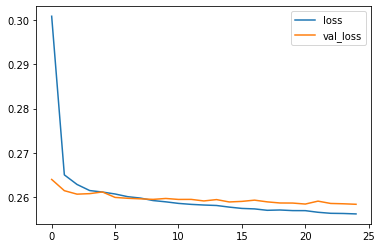

In [132]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [133]:
from sklearn.metrics import classification_report, confusion_matrix

In [144]:
predictions = model.predict_classes(X_test)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [146]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.45      0.61     15533
           1       0.88      1.00      0.93     63673

    accuracy                           0.89     79206
   macro avg       0.92      0.72      0.77     79206
weighted avg       0.90      0.89      0.87     79206

